In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import holidays

from epf.util import load_and_concat_data
from epf.config import FeatureConfig

fc = FeatureConfig()

In [145]:
file_paths = fc.INPUT_PATHS
col_names = fc.COL_NAMES
to_resample = fc.TO_RESAMPLE

COLORS = {
    "blue": "#3a609c",
    "blue_grey": "#69a0cb",
    "light_blue": "#afe1f5",
    "dark_green": "#345c0e",
    "olive": "#74953d",
    "green": "#c0d159",
    "gold": "#ffd700",
    "orange": "#ffb14e",
    "light_orange": "#fa8775",
    "magenta": "#840853",
    "purple": "#ba55aa",
    "light_purple": "#d1a7ef"
}

In [146]:
df = []
freq = {}
dates = {}
feature_names = {
    "de_prices" : "Prices DE_LU",
    "de_load" : "Load DE",
    "de_solar_gen" : "Solar DE",
    "de_wind_gen_offshore" : "Wind generation offshore DE",
    "de_wind_gen_onshore" : "Wind generation onshore DE",
    "de_gas_gen" : "Gas generation DE",
    "de_lignite_gen" : "Lignite generation DE",
    "de_hard_coal_gen" : "Hard coal generation DE",
    "ch_load" : "Load CH",
    "dk_load" : "Load DK",
    "fr_load" : "Load FR",
    "ch_prices" : "Prices CH",
    "dk1_prices" : "Prices DK1",
    "dk2_prices" : "Prices DK2",
    "fr_prices" : "Prices FR",
}

for file_path in file_paths.values():
    col_name = [k for k, v in file_paths.items() if v == file_path]
    data = load_and_concat_data(file_path, col_name[0])

    freq.update({col_name[0] : pd.infer_freq(data.index)})
    dates.update({col_name[0] : {"start" : data.index[0], "end" : data.index[-1]}})

    if data.columns.values[0] in to_resample:
        resample_freq: int = to_resample.get(data.columns.values[0])
        data = data[::resample_freq]

    df.append(data)

df = pd.concat(df, axis=1)

## Statistical Summary

In [85]:
summary = df.describe().transpose()
# match summary index with freq keys to accurately retrieve frequency values
summary["freq"] = summary.index.map(freq)
# get a start and end date for each feature, reformatting the index to a well readable date time format
summary["start"] = summary.index.map(lambda x: dates[x]["start"])
summary["end"] = summary.index.map(lambda x: dates[x]["end"])
summary["start"] = summary["start"].dt.strftime("%d.%m.%Y %H:%M")
summary["end"] = summary["end"].dt.strftime("%d.%m.%Y %H:%M")

summary.index = summary.index.map(feature_names)

summary

,count,mean,std,min,25%,50%,75%,max,freq,start,end
Prices DE_LU,17544.0,87.364521,57.217911,-500.00,62.8675,88.850,112.5000,2325.83,h,31.12.2022 23:00,31.12.2024 22:00
Load DE,70176.0,52660.885957,9146.020138,27932.90,45133.8000,52620.950,59759.2250,75766.70,15min,31.12.2022 23:00,31.12.2024 22:45
Solar DE,70176.0,6775.300281,10467.557921,0.80,3.2000,111.500,10712.4500,47065.80,15min,31.12.2022 23:00,31.12.2024 22:45
Wind generation offshore DE,70176.0,2803.653534,1863.546252,0.00,1123.5750,2608.650,4331.3500,7640.30,15min,31.12.2022 23:00,31.12.2024 22:45
Wind generation onshore DE,70176.0,13186.427301,10299.038422,42.40,4916.8250,10353.250,19277.9000,48157.90,15min,31.12.2022 23:00,31.12.2024 22:45
Gas generation DE,70176.0,6230.694668,3204.983150,1586.30,3681.8250,5572.150,7992.3000,19168.90,15min,31.12.2022 23:00,31.12.2024 22:45
Lignite generation DE,70176.0,8483.260824,3538.360315,2461.60,5346.1250,8347.950,11190.3000,17200.80,15min,31.12.2022 23:00,31.12.2024 22:45
Hard coal generation DE,70176.0,3823.886427,2855.113169,307.40,1793.2000,2931.800,5123.2250,15256.20,15min,31.12.2022 23:00,31.12.2024 22:45
Load CH,17544.0,6879.845651,1053.874647,2742.60,6185.0500,6898.400,7588.7250,10437.10,h,31.12.2022 23:00,31.12.2024 22:00
Load DK,17544.0,4061.867909,718.324942,2371.20,3526.4750,4047.250,4587.7250,9069.60,h,31.12.2022 23:00,31.12.2024 22:00


## Seasonal Analysis

In [267]:
# plot daily seasonality
df['hour'] = df.index.hour
df['day'] = df.index.day
df['day_string'] = [x.strftime('%a') for x in df.index]
df['month'] = df.index.month
df['month_string'] = [x.strftime('%b') for x in df.index]
df['year'] = df.index.year
df['week'] = [x.strftime('%W') for x in df.index]
df['season'] = [
    'Winter' if x.month in [12, 1, 2] else
    'Spring' if x.month in [3, 4, 5] else
    'Summer' if x.month in [6, 7, 8] else
    'Autumn' for x in df.index
]
de_holidays = holidays.country_holidays('DE', years=[2023,2024])
# set holiday to 1 if it is a holiday else 0
df['holiday'] = df.index.to_series().apply(lambda x: "Holiday" if x in de_holidays else "No holiday")

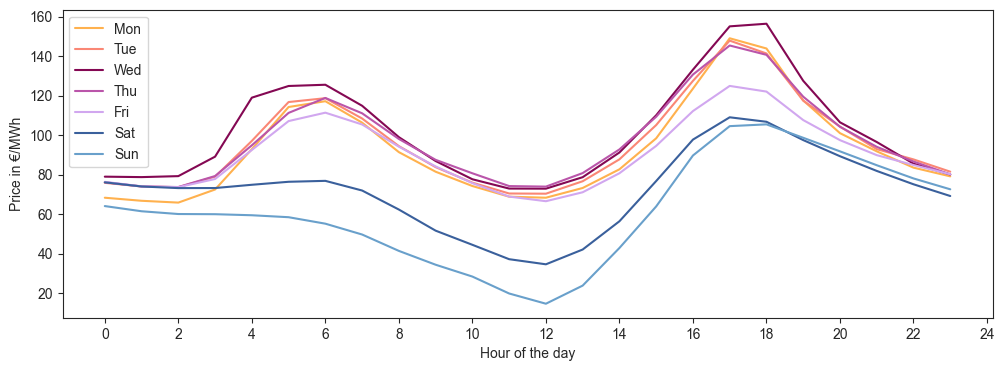

In [208]:
import seaborn as sns

day_colors = {
    'Mon': COLORS['orange'],
    'Tue': COLORS['light_orange'],
    'Wed': COLORS['magenta'],
    'Thu': COLORS['purple'],
    'Fri': COLORS['light_purple'],
    'Sat': COLORS['blue'],
    'Sun': COLORS['blue_grey'],
}
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

df_plot_daily = df[['hour', 'de_prices', 'day_string']].groupby(['hour', 'day_string']).mean()[['de_prices']].reset_index()

sns.set_style("ticks")

plt.figure(figsize=(12, 4))
sns.lineplot(data = df_plot_daily, x='hour', y='de_prices', hue='day_string', hue_order=day_order, palette=day_colors, legend=True)
plt.locator_params(axis='x', nbins=24)
plt.legend(loc='upper left')
plt.xlabel("Hour of the day")
plt.ylabel("Price in €/MWh")

#plt.title("Average prices per hour of the day in DE_LU bidding zone")

plt.savefig("../reports/figures/avg_hourly_prices.png", dpi=300, bbox_inches='tight')

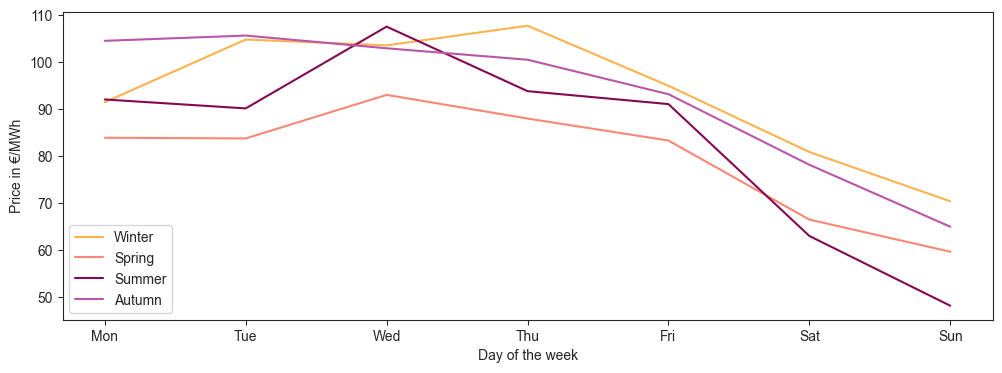

In [209]:
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

month_colors = {
    'Winter': COLORS['orange'],
    'Spring': COLORS['light_orange'],
    'Summer': COLORS['magenta'],
    'Autumn': COLORS['purple'],
}

months = df['month'].unique()
months = [month for month in month_order if month in df['month_string'].unique()]

df_plot_monthly = df[['de_prices', 'day_string', 'season']].groupby(['day_string', 'season']).mean()[['de_prices']].reset_index()
df_plot_monthly['day_string'] = pd.Categorical(df_plot_monthly['day_string'], categories=day_order, ordered=True)

sns.set_style("ticks")

plt.figure(figsize=(12, 4))
sns.lineplot(data = df_plot_monthly, x='day_string', y='de_prices', hue='season', hue_order=season_order, palette=month_colors, legend=True)
plt.legend(loc='lower left')
plt.xlabel("Day of the week")
plt.ylabel("Price in €/MWh")

#plt.title("Average prices per day of the week compared to season in DE_LU bidding zone")

plt.savefig("../reports/figures/avg_daily_prices.png", dpi=300, bbox_inches='tight')

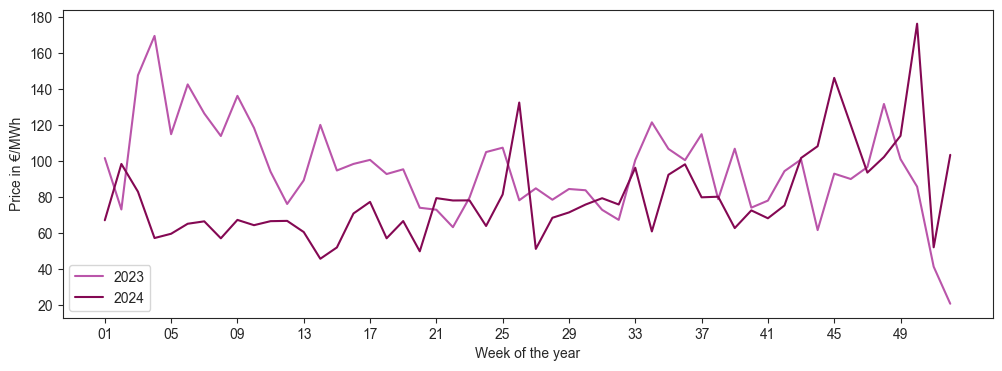

In [211]:
df_plot_yearly = df[['de_prices', 'week', 'year']].groupby(['week', 'year']).mean()[['de_prices']].reset_index()
i = df_plot_yearly[(df_plot_yearly.year == 2022)].index
df_plot_yearly.drop(i, inplace=True)
df_plot_yearly.drop(0, inplace=True)
df_plot_yearly.drop(106, inplace=True)

weeks = df_plot_yearly['week'].unique()

palette = {
    2023: COLORS["purple"],
    2024: COLORS["magenta"],
}

sns.set_style("ticks")

plt.figure(figsize=(12, 4))
sns.lineplot(data = df_plot_yearly, x='week', y='de_prices', hue='year', palette=palette, legend=True)
plt.xticks(ticks=weeks[::4], labels=weeks[::4])
plt.legend(loc='lower left')
plt.ylabel("Price in €/MWh")
plt.xlabel("Week of the year")

#plt.title("Average prices per week in DE_LU bidding zone")

plt.savefig("../reports/figures/avg_weekly_prices.png", dpi=300, bbox_inches='tight')

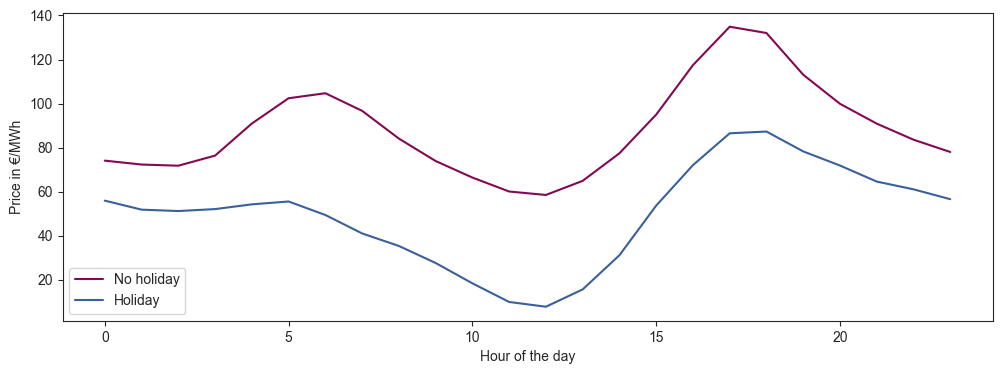

In [274]:
df_plot_holiday = df[['de_prices', 'holiday', 'hour']].groupby(['holiday', 'hour']).mean()[['de_prices']].reset_index()

palette = {
    "Holiday": COLORS["blue"],
    "No holiday": COLORS["magenta"],
}

hue_order = ['No holiday', 'Holiday']

sns.set_style("ticks")

plt.figure(figsize=(12, 4))
sns.lineplot(data = df_plot_holiday, x='hour', y='de_prices', hue='holiday', hue_order=hue_order, palette=palette, legend=True)
plt.legend(loc='lower left')
plt.xlabel("Hour of the day")
plt.ylabel("Price in €/MWh")

#plt.title("Average hourly prices in DE_LU bidding zone")

plt.savefig("../reports/figures/avg_holiday_prices.png", dpi=300, bbox_inches='tight')

## Correlation Analysis

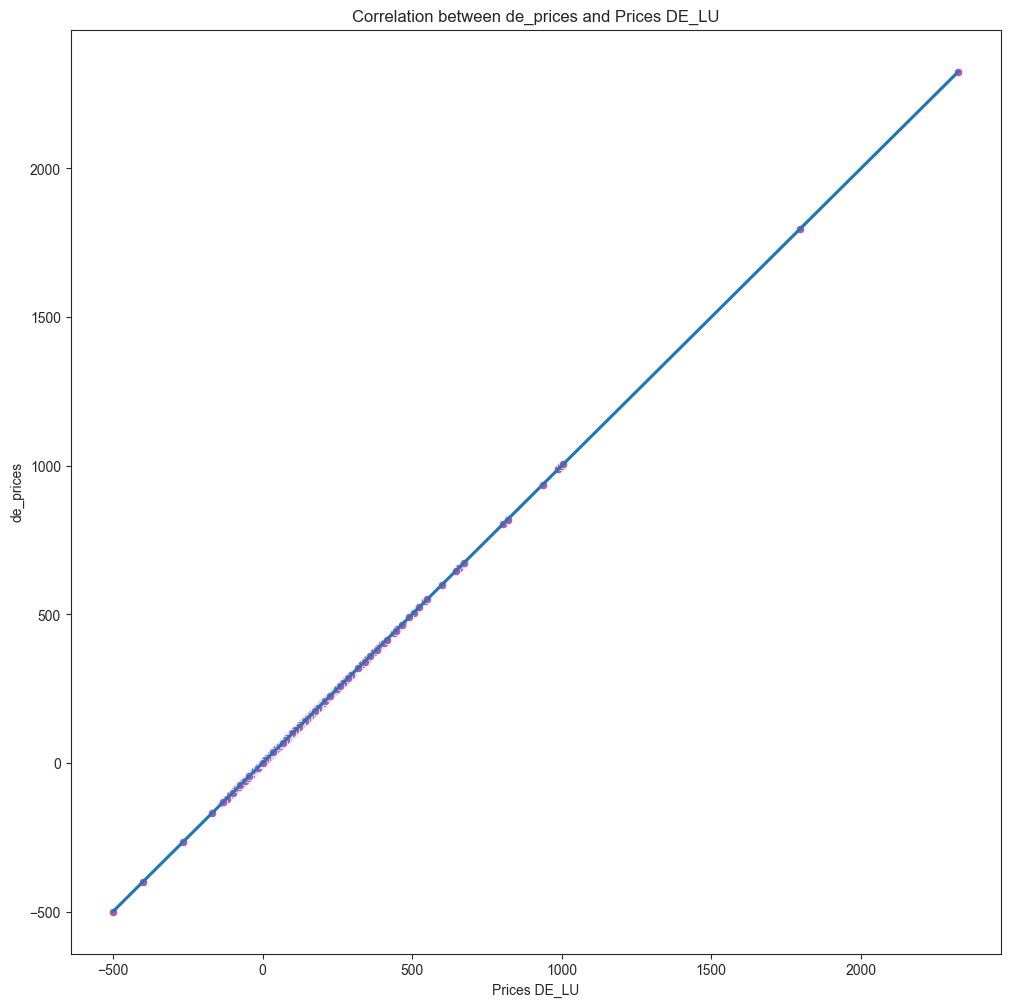

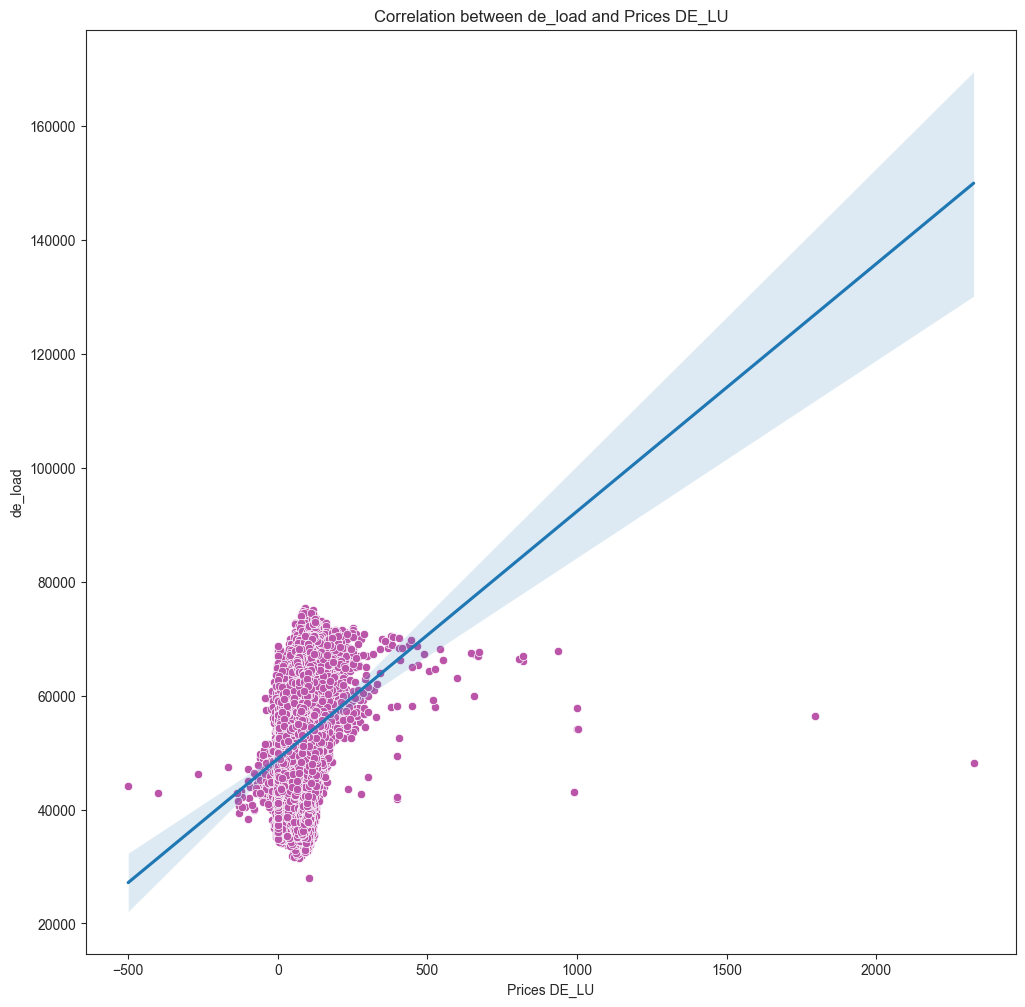

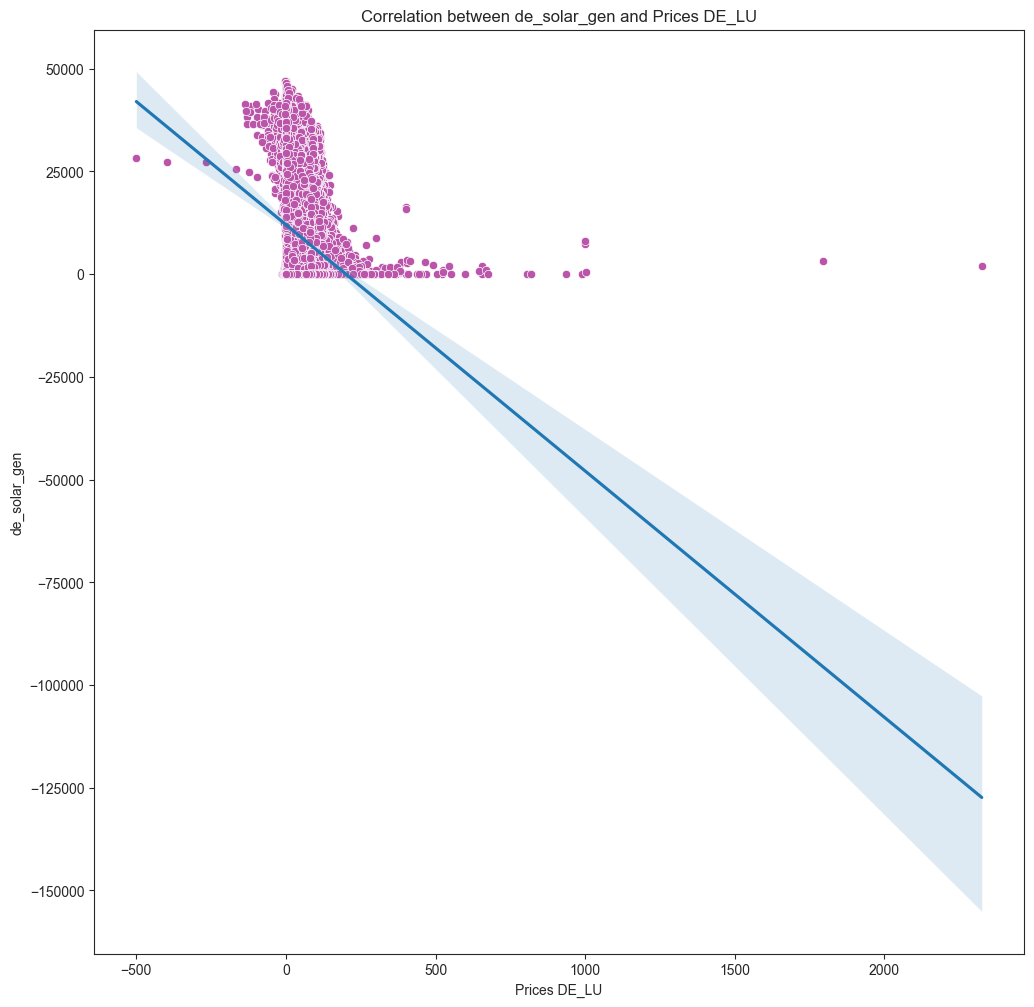

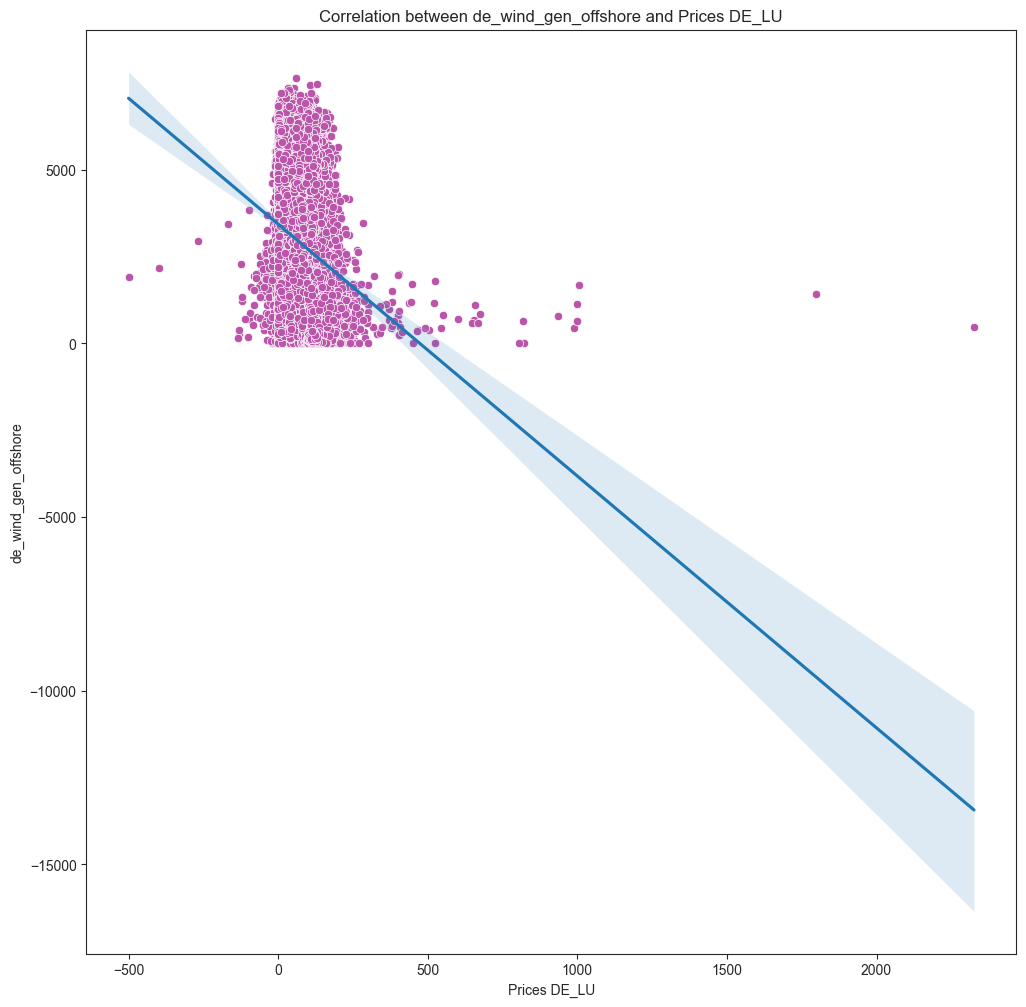

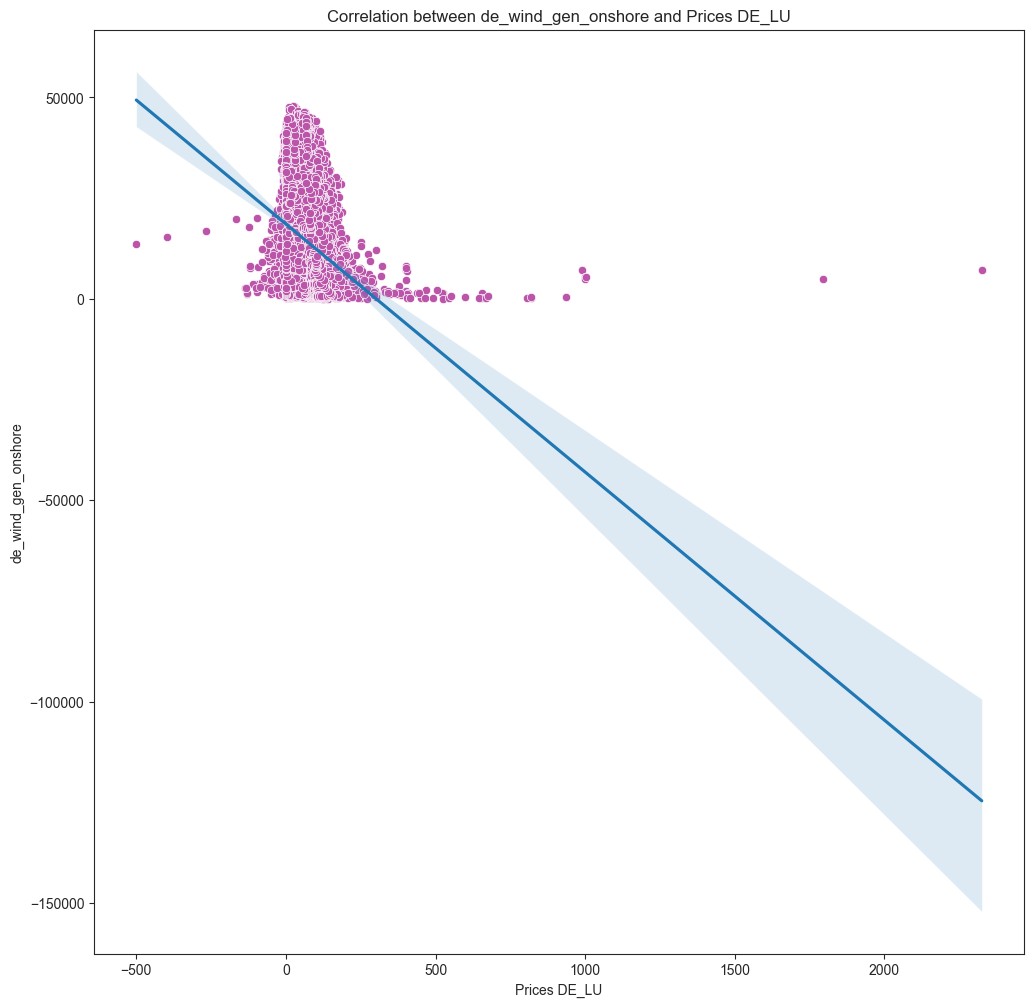

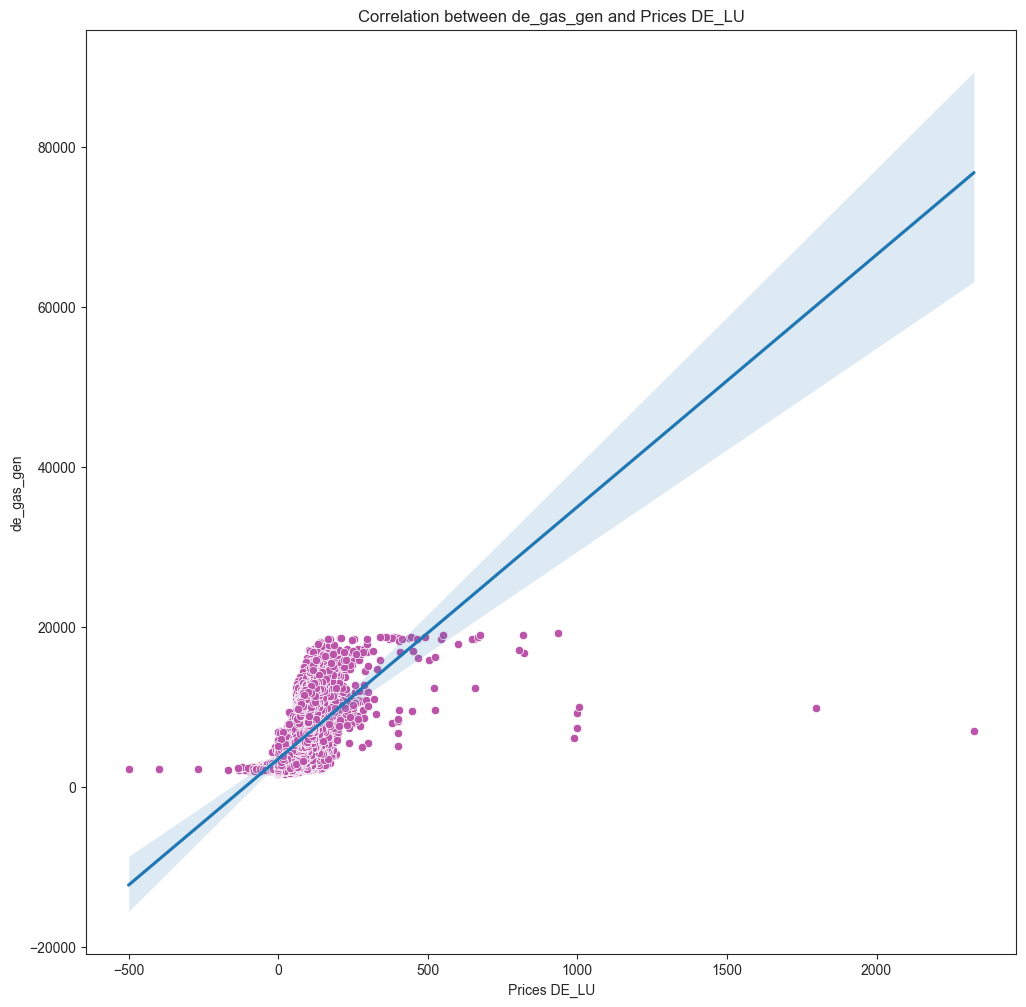

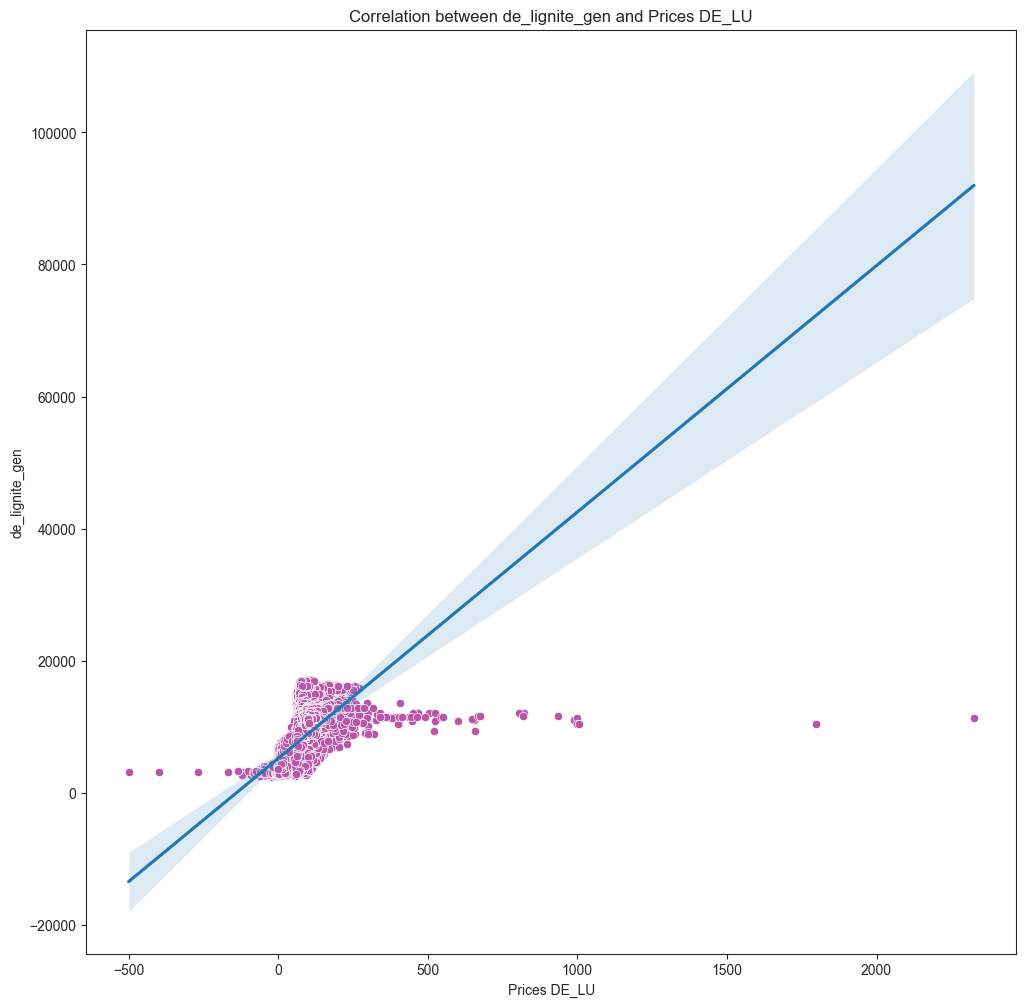

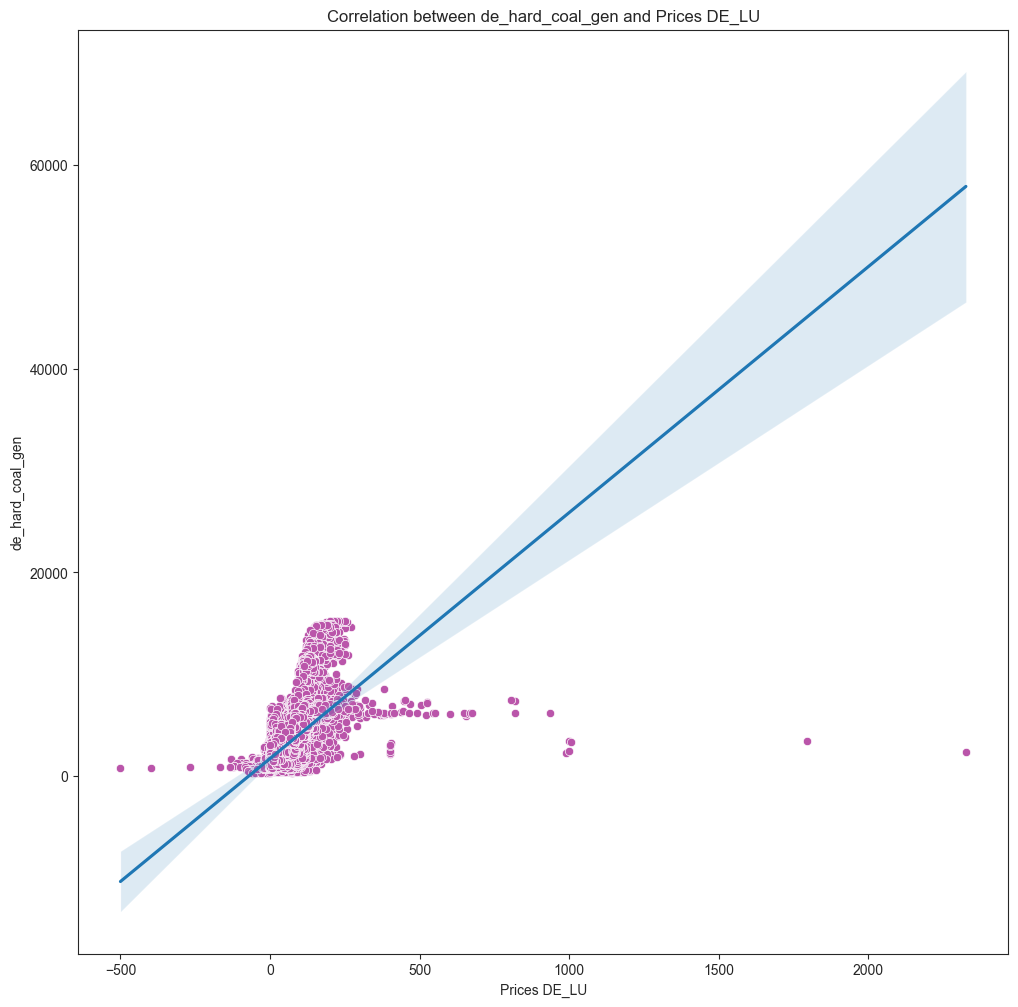

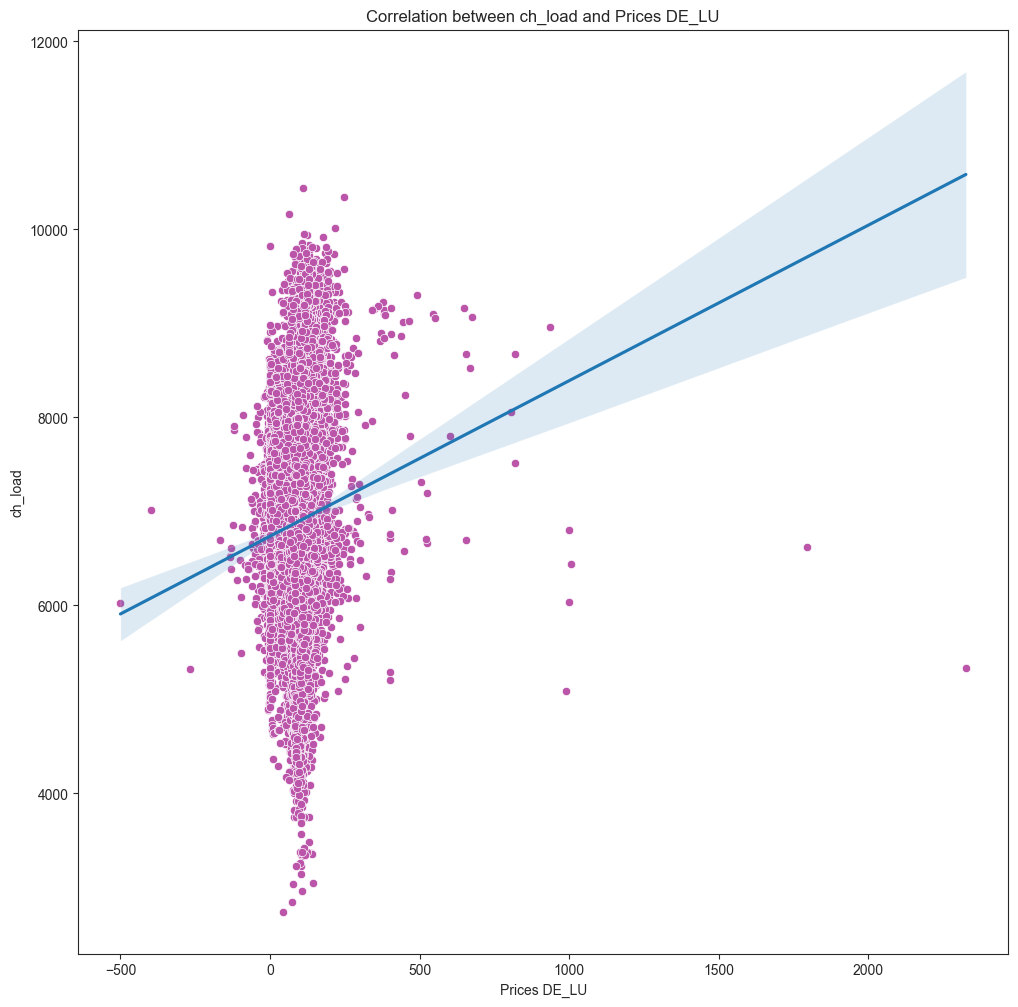

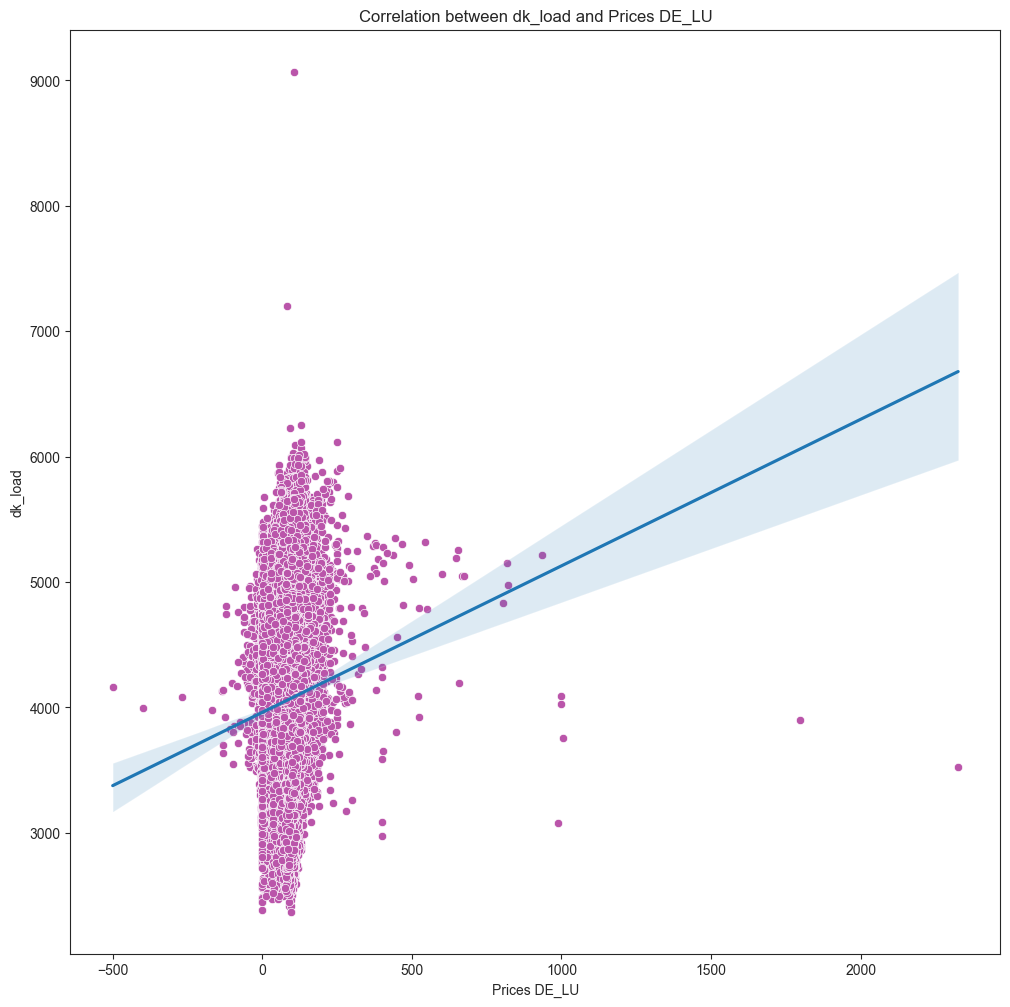

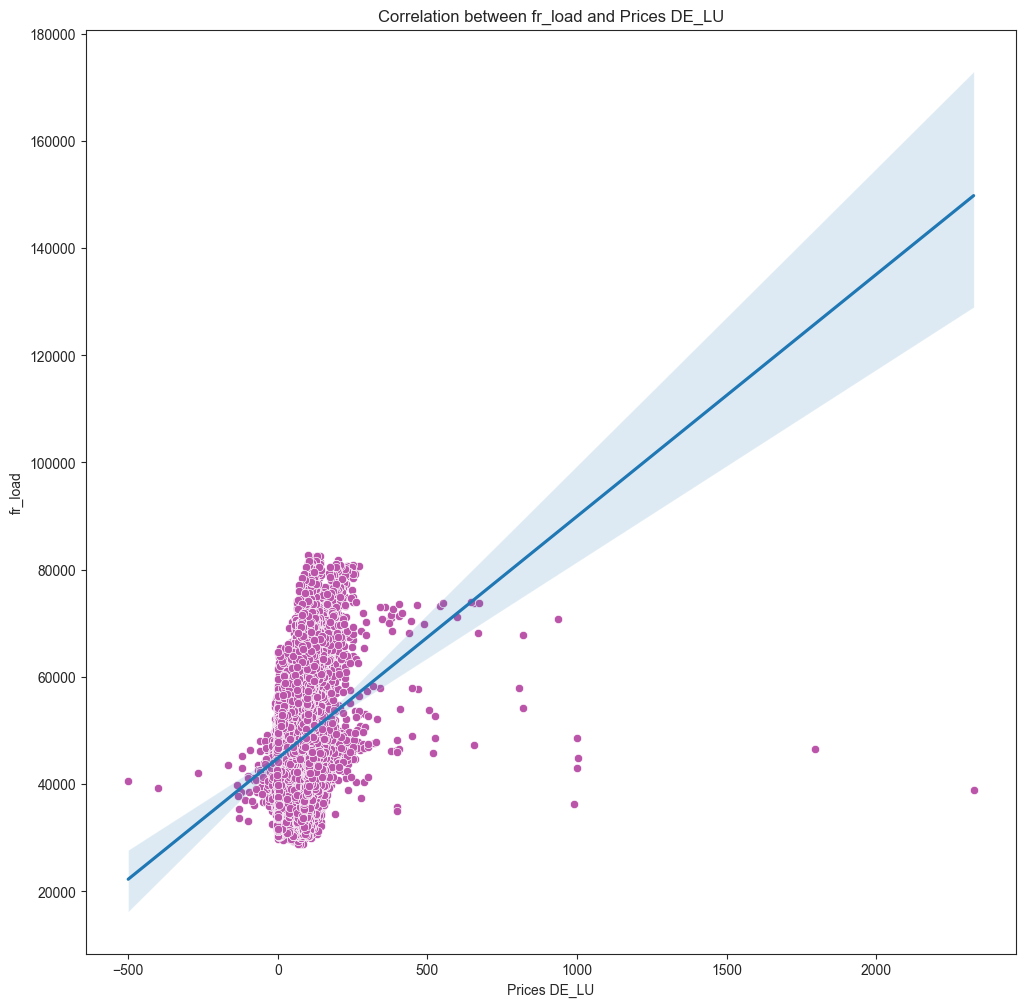

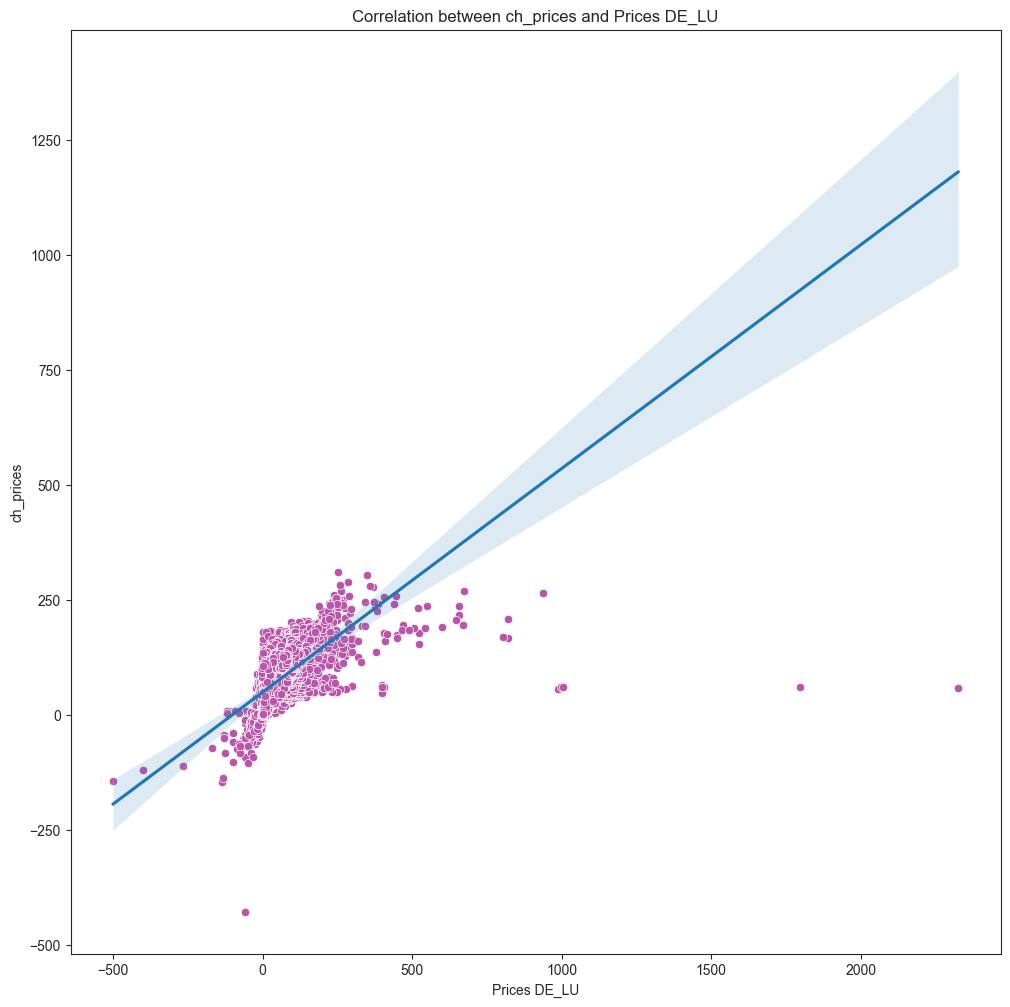

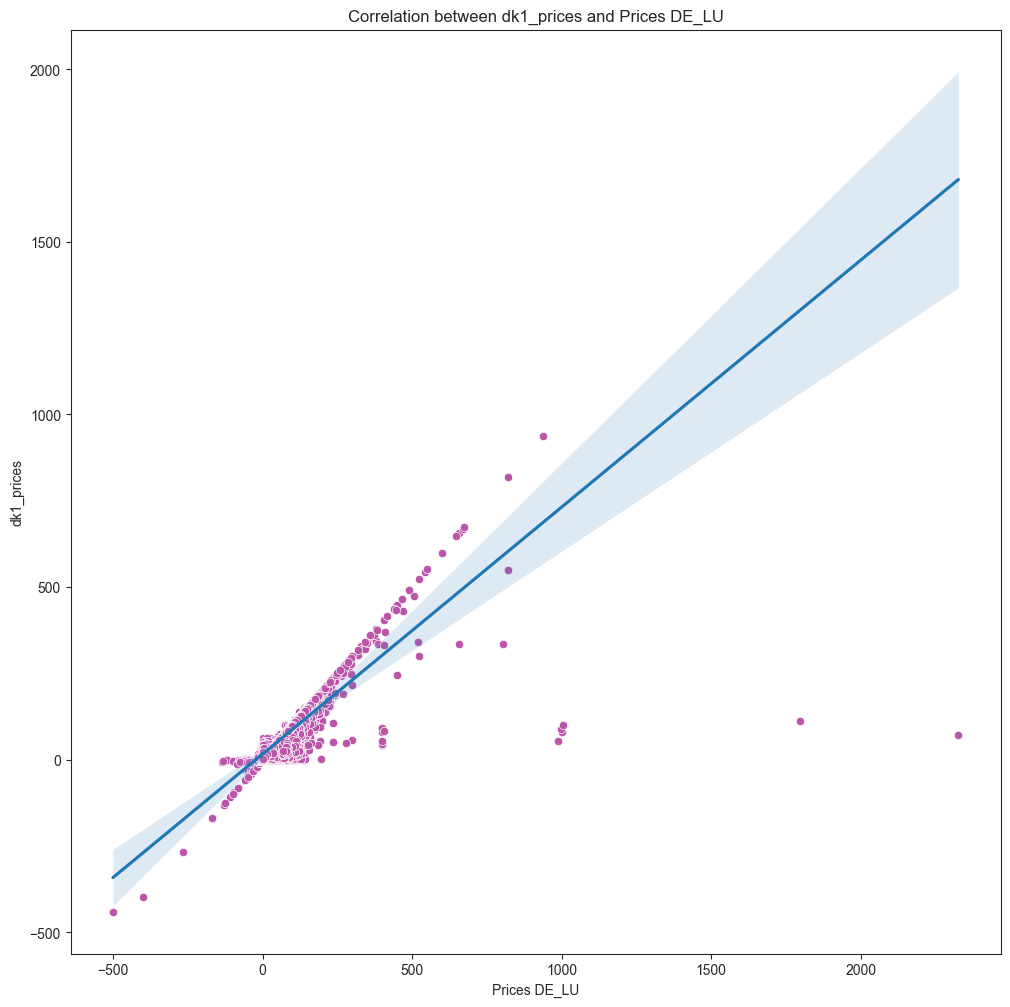

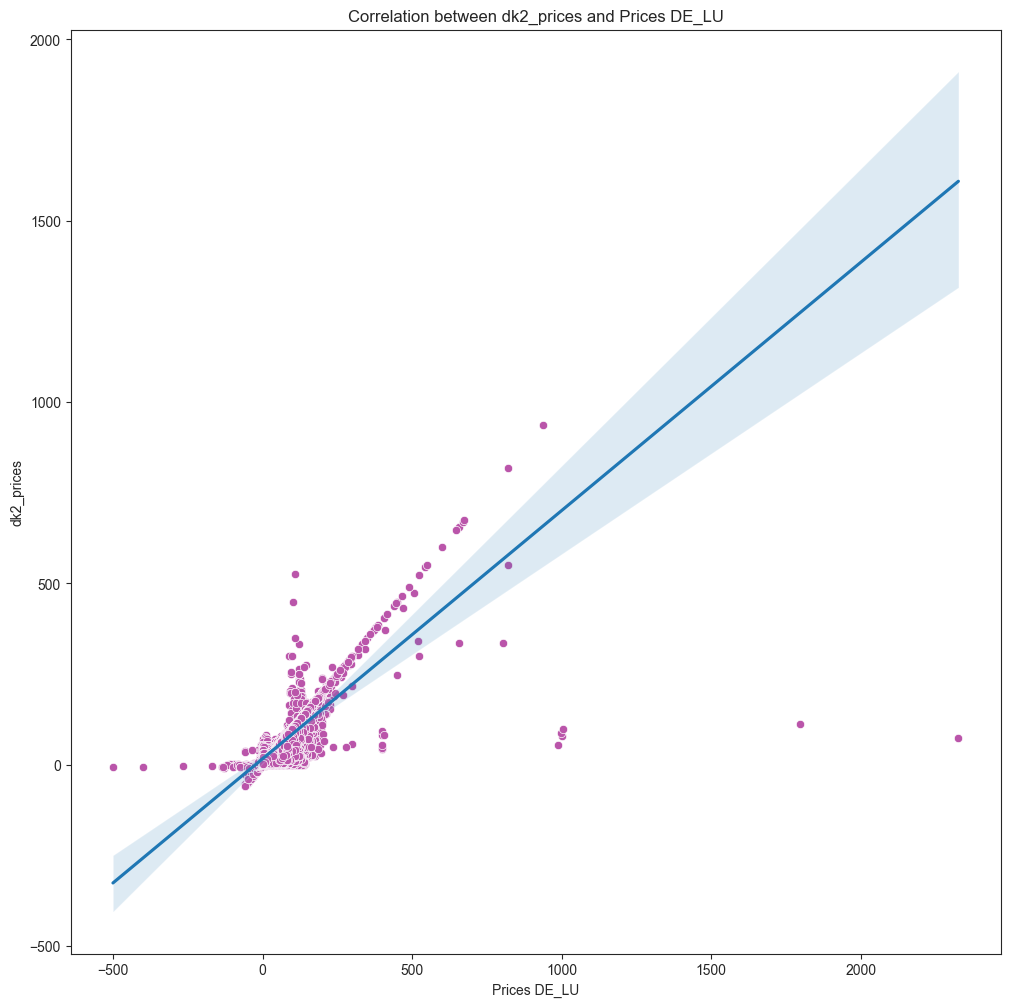

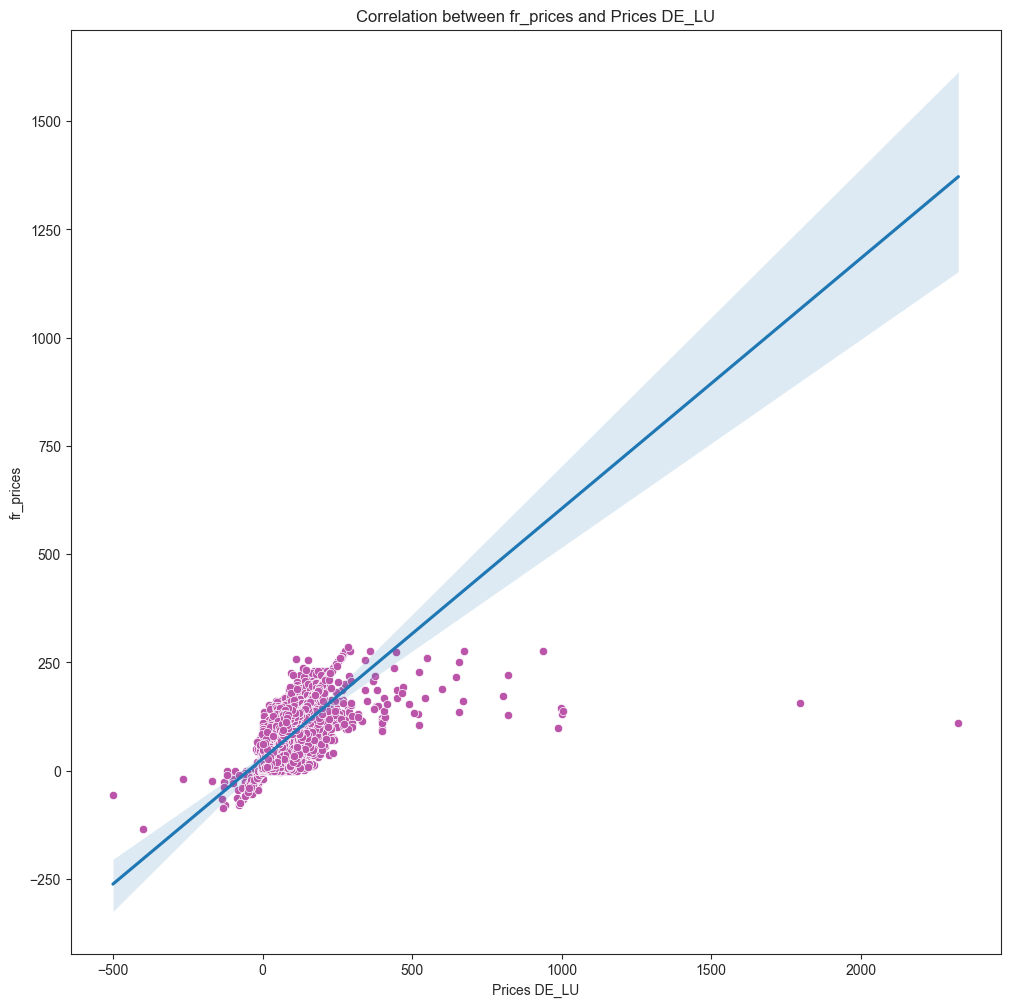

In [275]:
corr = df[['de_prices', 'de_load', 'de_solar_gen', 'de_wind_gen_offshore', 'de_wind_gen_onshore', 'de_gas_gen', 'de_lignite_gen',
 'de_hard_coal_gen', 'ch_load', 'dk_load', 'fr_load', 'ch_prices', 'dk1_prices', 'dk2_prices', 'fr_prices']]

sns.set_style("ticks")

# i want a set of tiny plots that show the correlation between prices and the other features
# add lines to the plots to show the correlation
for col in corr.columns:
    plt.figure(figsize=(12, 12))
    ax = sns.scatterplot(data=corr, x='de_prices', y=col, color=COLORS['purple'])
    sns.regplot(data=corr, x='de_prices', y=col, ax=ax, scatter=False)
    plt.title(f"Correlation between {col} and Prices DE_LU")
    plt.xlabel("Prices DE_LU")
    plt.ylabel(col)